<a href="https://colab.research.google.com/github/AashiDutt/Pytorch/blob/master/Perceptrons_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron is a single layered neural network.
In this repository we will code a basic neural network.

In [98]:
!pip3 install torch

In [0]:
import torch
import torch.nn as nn

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
# we use sklearn for linearly separable datasets


In [0]:
n_pts = 100  # no. of data points

# this list define central coordinates for our clusters
centers = [[-0.5,0.5],[0.5,-0.5]]

x ,y =datasets.make_blobs(n_samples=n_pts, random_state=123,centers=centers,cluster_std=0.4)
# creates a cluster of points centered around randomly choosen center points
# cluster_std=0.4 -- standard deviation of clustered points around respective centers
# as this value increases the points deviate or move away from the centers

# both x and y are numpy arrays but we need to convert them to tensors
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(100,1))

In [0]:
def scatter_plot():
  plt.scatter(x[y==0, 0],x[y==0,1])  # for dataset centered around[-0.5,0.5] have label 0
  plt.scatter(x[y==1, 0],x[y==1,1])  ## for dataset centered around[0.5,-0.5] have label 1

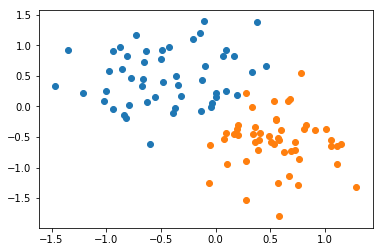

In [103]:
scatter_plot()

## how do machine separate two distinct datapoints?

The error function assigns penalty to each datapoint and the ones with highest penality are misclassified .

## total error = sum of penalties of all datapoints

solution - move the line in direction of most errors(towards datapoints with highest penality)
until all penalties are sufficiently small. 

## How to determine this error mathematically?

we use cross entropy function - points with label 1(positive area) have their probabilty near 1 while points with label 0 have  probability near 0(negative area).



In [0]:
 # Perceptron Model Setup

class Model(nn.Module):   # inherit nn.Module from base class
  def __init__(self ,input_size, output_size):# constructor to initialize
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)
    
  def forward(self,x):
    pred = torch.sigmoid(self.linear(x)) #converting values to probabilty
    return pred
  
  def predict(self,x):
    pred = self.forward(x)  # returns probability
    
    # if probability >= 0.5 return class1 else return class0
    if pred >= 0.5:
      return 1
    else:
      return 0

Perceptron Model

x1 -----------------

x2 -------------- sigmoid fun(  1/1+exp(-x)) ------out
                                 
                       
bias---------------


out =sigmoid( x1*w1 + x2 *w2 +b)


In [105]:
torch.manual_seed(2)
model = Model(2,1)    # 2 inputs , 1 output
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
# extracting model parameters

[w,b] =model.parameters()
# print(w,b)   w is a 2D tensor and b is 1D tensor

w1 ,w2 = w.view(2)

def get_param():
  return(w1.item(),w2.item(),b[0].item())

In [0]:
def plot_fit():
  #0 = w1*x1 +w2*x2 +b
  w1 ,w2, b1 = get_param()
  x1 = np.array([-2.0,2.0])
  x2 = (w1*x1 + b1)/(-w2)
  
  plt.plot(x1,x2,'r')
  scatter_plot()

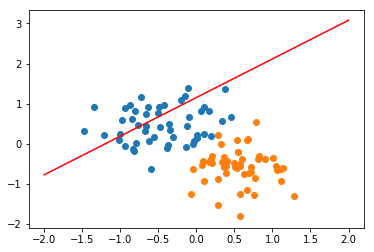

In [108]:
plot_fit()

In [0]:
# Training data to fit dataset well
#Binary Cross Entropy Loss(BCEL) for two classes (blue and orange in this case)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr =0.01)


In [110]:
epochs = 1000  # no. of times the model moves forward and backward through a neural network
losses =[]
for i in range(epochs):
  y_pred = model.forward(x_data)  # find y predicted
  loss = criterion(y_pred,y_data) # find loss
  print("epoch:",i,"loss:",loss.item())
  losses.append(loss.item()) # update loss
  optimizer.zero_grad()      # to not allow gradient from accumulating
  loss.backward()            # derivative of loss
  optimizer.step()           # update paramtersbased on gradients


epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.6174639463424683
epoch: 2 loss: 0.6164201498031616
epoch: 3 loss: 0.6153794527053833
epoch: 4 loss: 0.614342451095581
epoch: 5 loss: 0.6133086681365967
epoch: 6 loss: 0.6122783422470093
epoch: 7 loss: 0.6112515330314636
epoch: 8 loss: 0.6102280616760254
epoch: 9 loss: 0.6092080473899841
epoch: 10 loss: 0.6081910729408264
epoch: 11 loss: 0.6071775555610657
epoch: 12 loss: 0.606167733669281
epoch: 13 loss: 0.6051608920097351
epoch: 14 loss: 0.604157567024231
epoch: 15 loss: 0.6031574606895447
epoch: 16 loss: 0.602160632610321
epoch: 17 loss: 0.6011670827865601
epoch: 18 loss: 0.6001767516136169
epoch: 19 loss: 0.599189817905426
epoch: 20 loss: 0.5982059240341187
epoch: 21 loss: 0.5972254276275635
epoch: 22 loss: 0.5962479114532471
epoch: 23 loss: 0.5952739119529724
epoch: 24 loss: 0.5943028926849365
epoch: 25 loss: 0.5933352112770081
epoch: 26 loss: 0.5923705101013184
epoch: 27 loss: 0.5914090275764465
epoch: 28 loss: 0.5904508829116821


Text(0, 0.5, 'epoch')

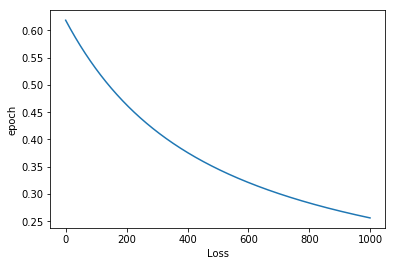

In [111]:
# plotting losses
plt.plot(range(epochs),losses)
plt.xlabel('Loss')
plt.ylabel('epoch')

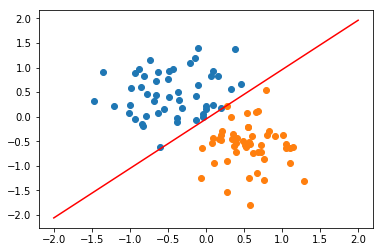

In [112]:
plot_fit()

# all blue points are labeled as class 0 while others are labeled as class 1

Green point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Green point  in class 1
Black point  in class 0


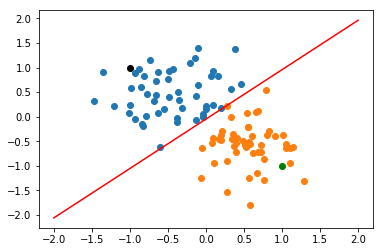

In [114]:
# Making Prediction on a random point for visualization purposes

# selecting points
point1 = torch.tensor([1.0,-1.0])  # inputs x1 and x2
point2 = torch.tensor([-1.0,1.0])

# plotting points
plt.plot(point1.numpy()[0],point1.numpy()[1], 'go')
plt.plot(point2.numpy()[0],point2.numpy()[1], 'ko')

print("Green point positive probability = {}".format(model.forward(point1).item()))
# green point has probability near to 1 therefore lies in class 1

print("Black point positive probability = {}".format(model.forward(point2).item()))
#Black point has probability near to 0 therefore lies in class 0

print("Green point  in class {}".format(model.predict(point1)))
print("Black point  in class {}".format(model.predict(point2)))     

plot_fit()